In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [4]:
pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 6.0 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.3/911.3 kB 8.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 10.4 MB/s eta 0:00:0000:0100:01
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Train
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [3]:
# X_train_estimated
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

In [4]:
# X_train_observed
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

In [5]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [39]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.0/653.0 kB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.3 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 7.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 9.1 MB/s eta 0:00:00:00:0100:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=9d4a655207766149158126bf106d2ee26102fd6290ad49333357bed0f39ba2ef
  Stored in directory: /Users/marijansoric/Library/Caches/pip/wheels/ab/a0/78/885e94cd7af32ff1

In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(X_train_estimated_a, title="Profiling Report")

In [9]:
profile.to_file("Marijan.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
train_a.to_csv('y_a.csv')

In [55]:
X_train_estimated_a.to_csv('X_est.csv')
X_train_observed_a.to_csv('X_obs.csv')

In [20]:
y = pd.read_csv('y_a.csv', index_col='time', parse_dates=True)

In [85]:
X_est = pd.read_csv('X_est.csv', index_col='date_forecast', parse_dates=True)
X_obs = pd.read_csv('X_obs.csv', index_col='date_forecast', parse_dates=True)

X_est.drop(['Unnamed: 0'], axis=1, inplace=True)
X_obs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [93]:
print(X_est.index)
X_obs.index

DatetimeIndex(['2022-10-28 22:00:00', '2022-10-28 22:15:00',
               '2022-10-28 22:30:00', '2022-10-28 22:45:00',
               '2022-10-28 23:00:00', '2022-10-28 23:15:00',
               '2022-10-28 23:30:00', '2022-10-28 23:45:00',
               '2022-10-29 00:00:00', '2022-10-29 00:15:00',
               ...
               '2023-04-30 21:30:00', '2023-04-30 21:45:00',
               '2023-04-30 22:00:00', '2023-04-30 22:15:00',
               '2023-04-30 22:30:00', '2023-04-30 22:45:00',
               '2023-04-30 23:00:00', '2023-04-30 23:15:00',
               '2023-04-30 23:30:00', '2023-04-30 23:45:00'],
              dtype='datetime64[ns]', name='date_forecast', length=17576, freq=None)


DatetimeIndex(['2019-06-02 22:00:00', '2019-06-02 22:15:00',
               '2019-06-02 22:30:00', '2019-06-02 22:45:00',
               '2019-06-02 23:00:00', '2019-06-02 23:15:00',
               '2019-06-02 23:30:00', '2019-06-02 23:45:00',
               '2019-06-03 00:00:00', '2019-06-03 00:15:00',
               ...
               '2022-10-20 22:45:00', '2022-10-20 23:00:00',
               '2022-10-20 23:15:00', '2022-10-20 23:30:00',
               '2022-10-20 23:45:00', '2022-10-21 00:00:00',
               '2022-10-21 00:15:00', '2022-10-21 00:30:00',
               '2022-10-21 00:45:00', '2022-10-21 01:00:00'],
              dtype='datetime64[ns]', name='date_forecast', length=118669, freq=None)

In [27]:
y.drop(['Unnamed: 0'], axis=1, inplace=True)

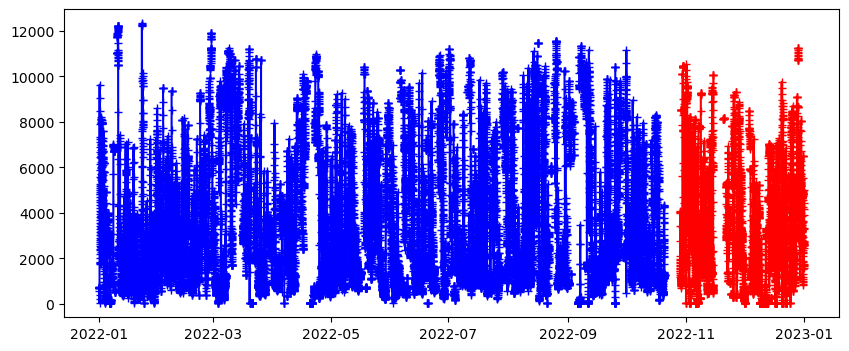

In [91]:
fig = plt.figure()
fig.set_size_inches(10, 4)
# Tracer le premier graphique dans la première colonne
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_est['ceiling_height_agl:m'].loc['2022'], color='r',marker='+')
ax.plot(X_obs['ceiling_height_agl:m'].loc['2022'], color='b',marker='+')

<AxesSubplot: xlabel='date_forecast'>

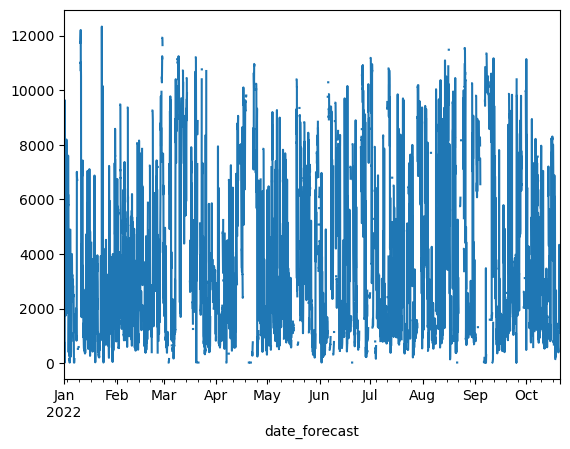

In [67]:
.plot()

<AxesSubplot: xlabel='time'>

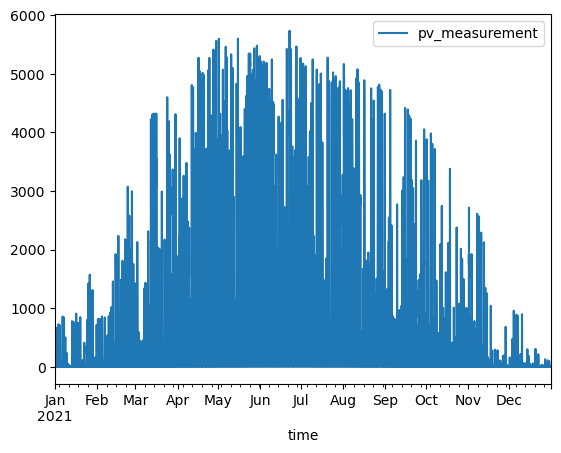

In [36]:
y.loc['2021'].plot()

<AxesSubplot: xlabel='time'>

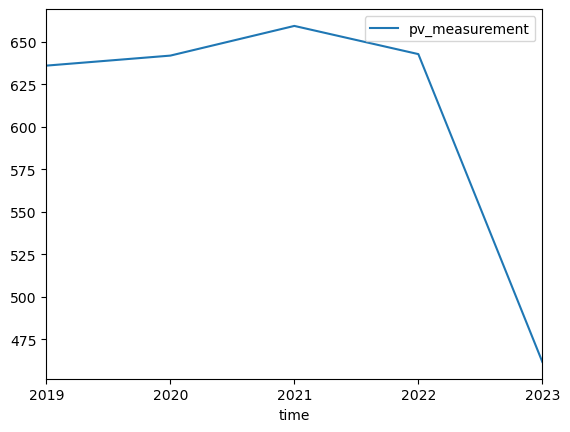

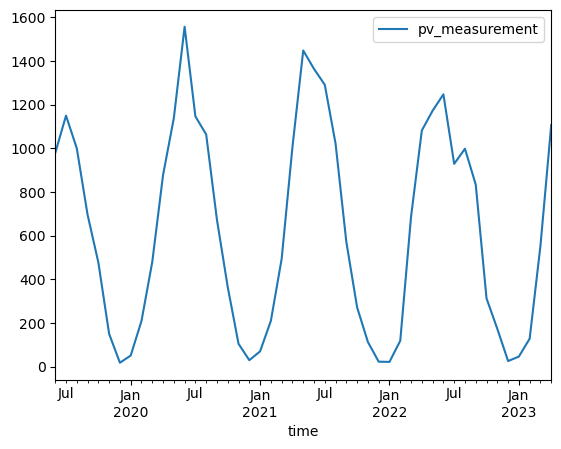

In [43]:
y.resample('Y').mean().plot()
y.resample('M').mean().plot()

<Figure size 1200x800 with 0 Axes>

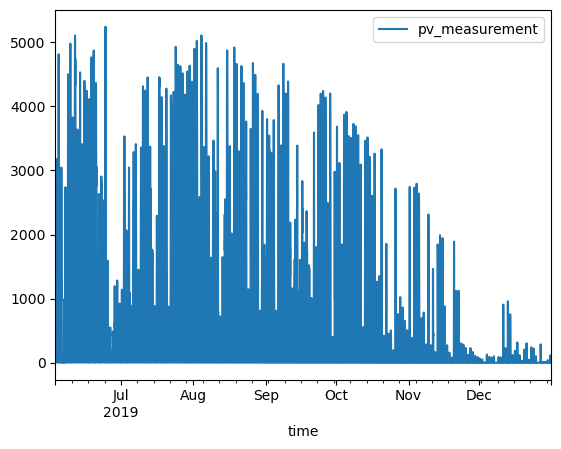

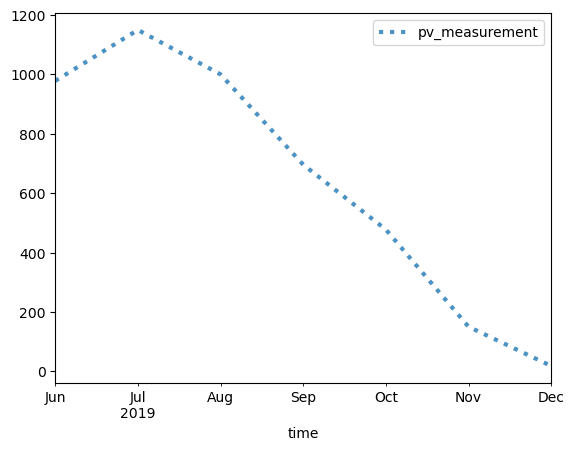

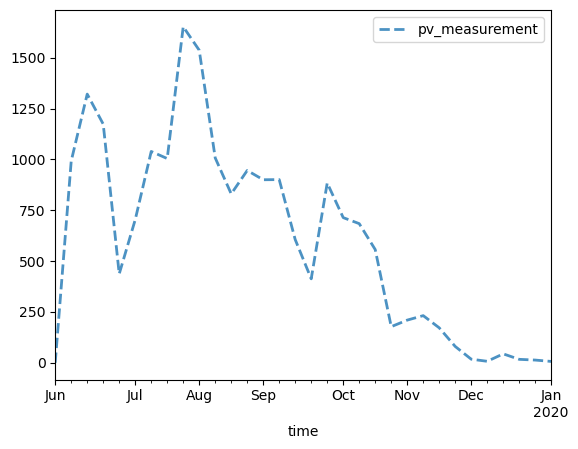

In [32]:
plt.figure(figsize=(12, 8))
y.loc['2019'].plot()
y.loc['2019'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
y.loc['2019'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

<AxesSubplot: xlabel='time'>

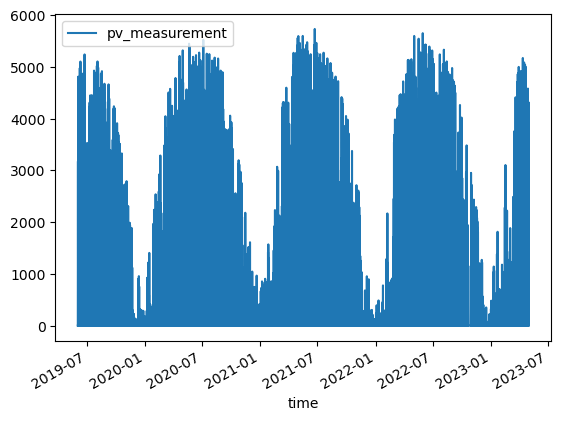

In [16]:
train_a.plot('time','pv_measurement')

In [12]:
X_train_estimated_a.head()

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.0,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.0,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.0,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.0,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.0,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.0,6254.399902,0.6,-0.1,0.6,-0.0


In [14]:
X_train_estimated_a.dtypes

date_calc                         datetime64[ns]
date_forecast                     datetime64[ns]
absolute_humidity_2m:gm3                 float32
air_density_2m:kgm3                      float32
ceiling_height_agl:m                     float32
clear_sky_energy_1h:J                    float32
clear_sky_rad:W                          float32
cloud_base_agl:m                         float32
dew_or_rime:idx                          float32
dew_point_2m:K                           float32
diffuse_rad:W                            float32
diffuse_rad_1h:J                         float32
direct_rad:W                             float32
direct_rad_1h:J                          float32
effective_cloud_cover:p                  float32
elevation:m                              float32
fresh_snow_12h:cm                        float32
fresh_snow_1h:cm                         float32
fresh_snow_24h:cm                        float32
fresh_snow_3h:cm                         float32
fresh_snow_6h:cm    

In [58]:
X_train_observed_a.dtypes

date_forecast                     datetime64[us]
absolute_humidity_2m:gm3                 float32
air_density_2m:kgm3                      float32
ceiling_height_agl:m                     float32
clear_sky_energy_1h:J                    float32
clear_sky_rad:W                          float32
cloud_base_agl:m                         float32
dew_or_rime:idx                          float32
dew_point_2m:K                           float32
diffuse_rad:W                            float32
diffuse_rad_1h:J                         float32
direct_rad:W                             float32
direct_rad_1h:J                          float32
effective_cloud_cover:p                  float32
elevation:m                              float32
fresh_snow_12h:cm                        float32
fresh_snow_1h:cm                         float32
fresh_snow_24h:cm                        float32
fresh_snow_3h:cm                         float32
fresh_snow_6h:cm                         float32
is_day:idx          